#### Your task is to investigate the data visually and present some conclusions about any characteristics you
#### discover, including correlations, seasonal behaviour, outliers, etc., together with a suggestion about how the
#### data might be best segmented, based on the total volume of visits at each outlet.

    daily_customer_data=pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001250463/OutletDailyCustomers.csv')

    outletmarketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001250463/OutletMarketing.csv')

    outletoverhead = pd.read_csv('https://tinyurl.com/ChrisCoDV/001250463/OutletOverheads.csv')

    outletsize = pd.read_csv('https://tinyurl.com/ChrisCoDV/001250463/OutletSize.csv')

    outletstaff = pd.read_csv('https://tinyurl.com/ChrisCoDV/001250463/OutletStaff.csv')

In [2]:
#IMPORT LIBRARIES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#READ IN DATA USING PANDAS

daily_customer_data = pd.read_csv('OutletDailyCustomers.csv')
outletmarketing = pd.read_csv('OutletMarketing.csv')
outletoverhead = pd.read_csv('OutletOverheads.csv')
outletsize = pd.read_csv('OutletSize.csv')
outletstaff = pd.read_csv('OutletStaff.csv')

In [4]:
# VIEW OF CUSTOMER DATA
daily_customer_data.head(5)

,Date,PFQ,DSA,EEC,HTF,XSB,EYS,AYD,RAN,CTH,...,QZF,CNW,FZI,YMQ,NFH,NLT,IZX,LLK,IFI,HZQ
0,2021-01-01,77,1260,1006,98,0,881,0,1956,65,...,78,75,82,0,86,65,81,94,68,72
1,2021-01-02,63,1062,1045,89,0,935,0,2141,57,...,77,65,79,0,88,75,86,66,90,62
2,2021-01-03,69,981,997,88,0,1064,0,1922,67,...,68,63,95,0,82,66,83,88,111,66
3,2021-01-04,78,713,1063,85,0,1004,0,1708,66,...,72,71,80,0,86,65,83,91,60,68
4,2021-01-05,69,1104,834,85,0,909,0,1966,67,...,78,75,81,0,81,71,74,67,74,61


In [5]:
# VIEW OF MARKETING DATA
outletmarketing.head(5)

,Id,Marketing (£)
0,PFQ,3000
1,DSA,44000
2,EEC,31000
3,HTF,2000
4,XSB,2000


In [6]:
# VIEW OF OVERHEAD DATA
outletoverhead.head(5)

,Id,Overheads (£)
0,PFQ,31000
1,DSA,61000
2,EEC,67000
3,HTF,55000
4,XSB,76000


In [7]:
# VIEW OF OUTLET SIZE DATA
outletsize.head(5)

,Id,Size (msq)
0,PFQ,73
1,DSA,2703
2,EEC,1575
3,HTF,101
4,XSB,115


In [8]:
# VIEW OF OUTLET STAFF DATA
outletstaff.head(5)

,Id,Staff
0,PFQ,1
1,DSA,18
2,EEC,8
3,HTF,1
4,XSB,2


In [9]:
# CONCATENATE ALL OUTLET DATA INTO ONE
summary_data = pd.concat([outletmarketing, outletoverhead['Overheads (£)'], outletsize['Size (msq)']
                            ,outletstaff['Staff']], axis=1)


#### VIEW OF BOTH DATA

In [10]:
summary_data.head()

,Id,Marketing (£),Overheads (£),Size (msq),Staff
0,PFQ,3000,31000,73,1
1,DSA,44000,61000,2703,18
2,EEC,31000,67000,1575,8
3,HTF,2000,55000,101,1
4,XSB,2000,76000,115,2


#### VISUALIZATION OF SUMMARY DATA

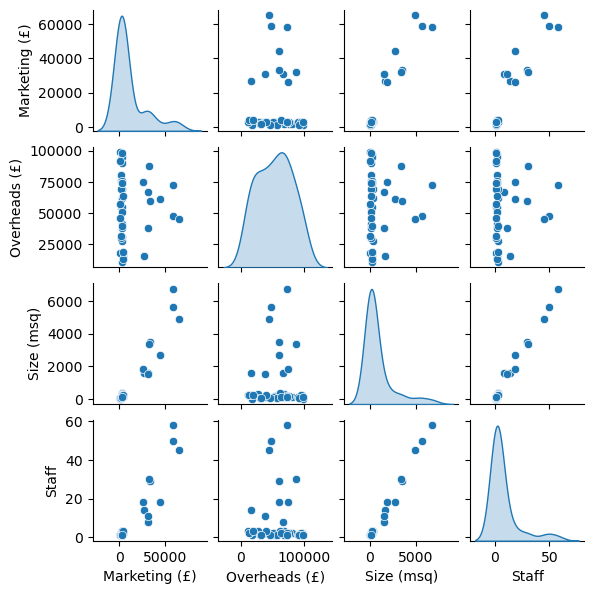

In [231]:
sns.pairplot(summary_data, diag_kind='kde',height=1.5)
plt.show()

In [11]:
daily_customer_data.head(5)

,Date,PFQ,DSA,EEC,HTF,XSB,EYS,AYD,RAN,CTH,...,QZF,CNW,FZI,YMQ,NFH,NLT,IZX,LLK,IFI,HZQ
0,2021-01-01,77,1260,1006,98,0,881,0,1956,65,...,78,75,82,0,86,65,81,94,68,72
1,2021-01-02,63,1062,1045,89,0,935,0,2141,57,...,77,65,79,0,88,75,86,66,90,62
2,2021-01-03,69,981,997,88,0,1064,0,1922,67,...,68,63,95,0,82,66,83,88,111,66
3,2021-01-04,78,713,1063,85,0,1004,0,1708,66,...,72,71,80,0,86,65,83,91,60,68
4,2021-01-05,69,1104,834,85,0,909,0,1966,67,...,78,75,81,0,81,71,74,67,74,61


### NUMBER OF OUTLETS

In [247]:
# GET NAMES OF ALL THE OUTLET
total_outlets_names = summary_data['Id']
total_outlets_names = list(total_outlets_names)
# total_outlets_names

In [13]:
# GET TOTAL NUMBER OF OUTLETS
total_outlets = summary_data.shape[0]

In [14]:
f"Number of outlets: {total_outlets}"

'Number of outlets: 45'

### LIST OF OUTLETS

<AxesSubplot:xlabel='Size (msq)', ylabel='Outlets'>

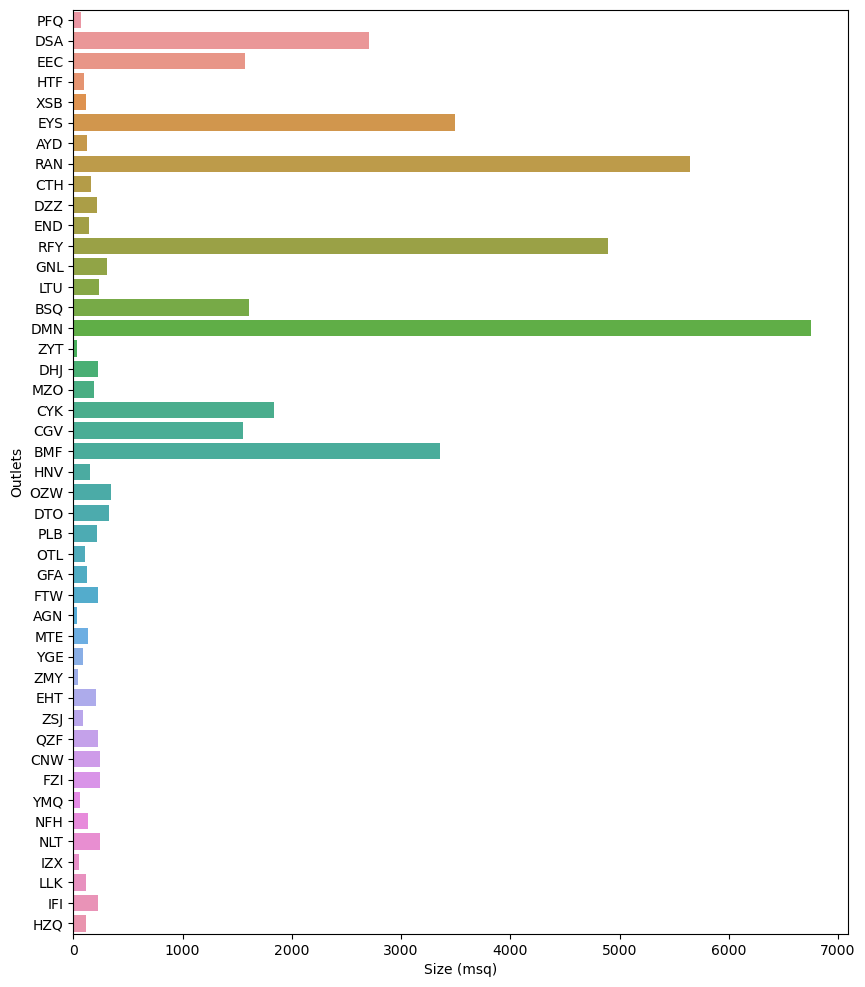

In [246]:
plt.figure(figsize=(10,12))

# SIZES OF ALL OUTLET
size_list = list(summary_data['Size (msq)'])

# SET PLOT X LABEL
plt.xlabel('Size (msq)')

# SET PLOT Y LABEL
plt.ylabel('Outlets')

# BAR PLOT SHOWING ALL OUTLETS WITH RESPECT TO SIZES
sns.barplot(x=size_list, y=total_outlets_names)

## VISUALIZE NUMBER OF OUTLET WITH RESPECT TO SIZE

#### LARGEST STORE SIZE

In [124]:
size = summary_data['Size (msq)'].max()
outlet = list(summary_data[summary_data['Size (msq)']==size]['Id'])
print('Largest outlet size: ',size)
print('Largest outlet: ',outlet)

Largest outlet size:  6757
Largest outlet:  ['DMN']


#### SMALLEST STORE SIZE

In [125]:
size = summary_data['Size (msq)'].min()
outlet = list(summary_data[summary_data['Size (msq)']==size]['Id'])
print('Smallest outlet size: ',size)
print('Smallest outlet: ',outlet)

Smallest outlet size:  31
Smallest outlet:  ['AGN']


#### AVERAGE STORE SIZE

In [126]:
size = summary_data['Size (msq)'].median()
outlet = list(summary_data[summary_data['Size (msq)']==size]['Id'])
print('Medium outlet size: ',size)
print('Medium outlet: ',outlet)

Medium outlet size:  215.0
Medium outlet:  ['PLB']


In [127]:
# Function to find duplicates
def find_duplicates(list):
    new = []
    for i in list:
        if list.count(i)>1:
            new.append(i)
    return new

### LARGE OUTLET (Store size > 1000)

In [128]:
# Getting the sizes of all large outlet stores
large_outlet_list = list(summary_data[summary_data['Size (msq)'] > 1000]['Size (msq)'])
large_outlet_list

[2703, 1575, 3494, 5648, 4890, 1606, 6757, 1834, 1552, 3355]

In [129]:
# Search for duplicates to prevent repetition of data for different outlet with similar sizes
duplicates = find_duplicates(large_outlet_list)
duplicates

[]

In [130]:
# Getting the names of all large outlet stores
large_outlet_names = list(summary_data[summary_data['Size (msq)'] > 1000]['Id'])

# Getting the number of large outlet
num_large_outlets = len(large_outlet_names)

f'Number of Large Outlet: {num_large_outlets}'

'Number of Large Outlet: 10'

### LARGE OUTLET

<AxesSubplot:>

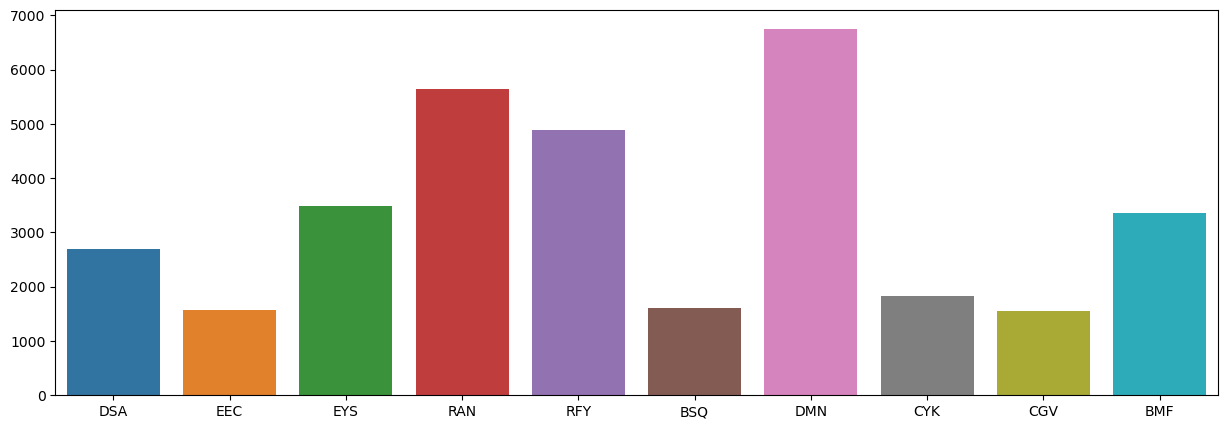

In [234]:
# PLOT SHOWING ALL LARGE OUTLET WITH RESPECT TO SIZE

plt.figure(figsize=(15,5))
sns.barplot(x=large_outlet_names, y = large_outlet_list)

### MEDIUM OUTLET (Store size <1000 and >=200)

In [132]:
# Getting the sizes of all medium outlet stores
medium_outlet_list = []
medium_initial = []
for i in summary_data['Size (msq)']:
    if i <1000 and i >=200:
        medium_outlet_list.append(i)
medium_outlet_list

[217, 308, 238, 222, 344, 326, 215, 222, 207, 222, 243, 245, 248, 222]

In [133]:
# Search for duplicates to prevent repetition of data for different outlet with similar sizes
duplicates = find_duplicates(medium_outlet_list)
duplicates

[222, 222, 222, 222]

In [239]:
# Get all medium outlet names
medium_label = []
for i in medium_outlet_list:
    a = list(summary_data[summary_data['Size (msq)']==i]['Id'])
    medium_label.append(a)
# medium_label

In [238]:
# Find duplicate names
count = 0
label_duplicate = []
while count < len(duplicates):
    value = list(summary_data[summary_data['Size (msq)']==duplicates[count]]['Id'])
    count = count+1
    label_duplicate.append(value)
# label_duplicate

In [136]:
# Convert duplicate names to not contain more than one label
duplicate_labels=[]
for i in label_duplicate:
    if i not in duplicate_labels:
        duplicate_labels.append(i)
duplicate_labels

[['DHJ', 'FTW', 'QZF', 'IFI']]

In [137]:
# Get duplicate indexes
indices = [i for i, x in enumerate(medium_label) if x in duplicate_labels]
print(indices)

[3, 7, 9, 13]


In [236]:
# Replace values at duplicate index with duplicate labels
count=0
for a in indices:
    for value in duplicate_labels:
        medium_label[indices[count]] = value[count]
        count=count+1
# medium_label

In [237]:
# Convert the above nested list into a single list which contains the names of all medium outlet
flattened_list = [item[0] if isinstance(item, list) else item for item in medium_label]
# flattened_list

In [140]:
# Getting the names of all medium outlets
medium_outlet_names = flattened_list

# Getting the number of medium outlet
num_medium_outlets = len(medium_outlet_names)

f'Number of Medium Outlet: {num_medium_outlets}'

'Number of Medium Outlet: 14'

### MEDIUM OUTLET

<AxesSubplot:>

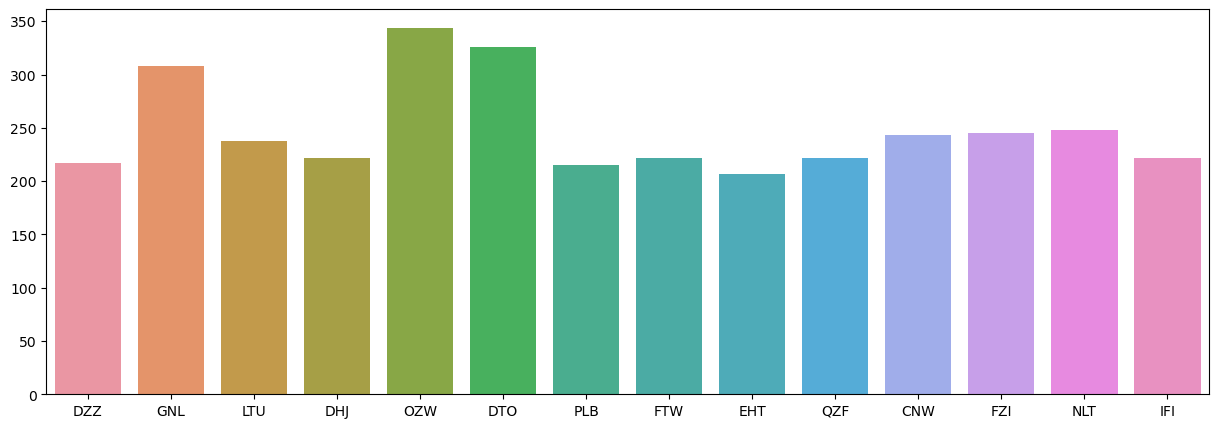

In [235]:
# PLOT SHOWING ALL MEDIUM OUTLET WITH RESPECT TO SIZE

plt.figure(figsize=(15,5))
sns.barplot(x=medium_outlet_names, y=medium_outlet_list)

### SMALL OUTLET (Store size < 200)

In [240]:
# Getting the sizes of all small outlet stores
small_outlet_list = list(summary_data[summary_data['Size (msq)'] < 200]['Size (msq)'])
# small_outlet_list

In [143]:
# Search for duplicates
duplicates = find_duplicates(small_outlet_list)
duplicates

[]

In [144]:
# Getting the names of all small outlet stores
small_outlet_names = list(summary_data[summary_data['Size (msq)'] < 200]['Id'])

# Getting the number of small outlet
num_small_outlets = len(small_outlet_names)

f'Number of Small Outlet: {num_small_outlets}'

'Number of Small Outlet: 21'

### SMALL OUTLET

<AxesSubplot:>

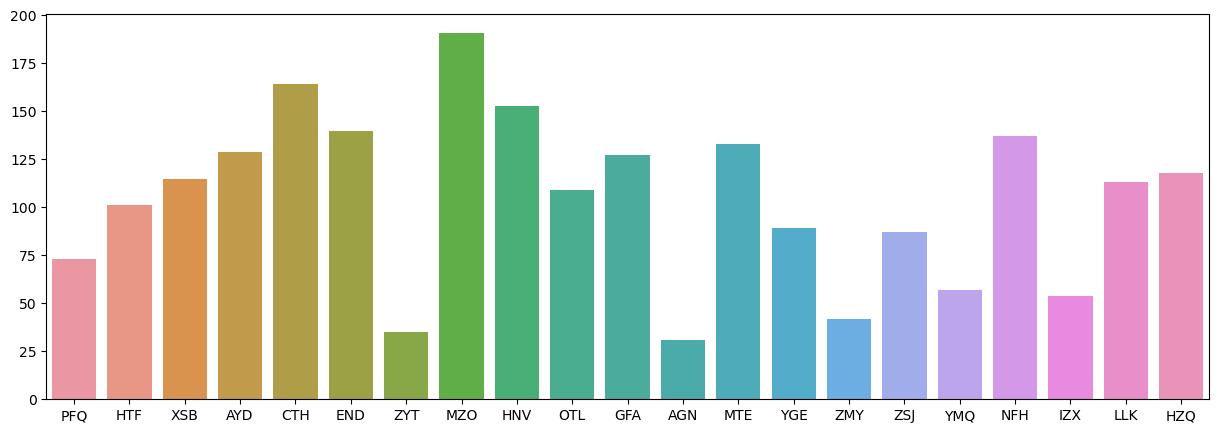

In [241]:
# PLOT SHOWING ALL SMALL OUTLET WITH RESPECT TO SIZE

plt.figure(figsize=(15,5))
sns.barplot(x = small_outlet_names, y = small_outlet_list)

#### PERCENTAGE OF EACH OUTLET WITH RESPECT TO SIZE

In [146]:
percentage_of_small_outlets = (num_small_outlets / total_outlets)*100
percentage_of_small_outlets

46.666666666666664

In [147]:
percentage_of_medium_outlets = (num_medium_outlets / total_outlets)*100
percentage_of_medium_outlets

31.11111111111111

In [148]:
percentage_of_large_outlets = (num_large_outlets / total_outlets)*100
percentage_of_large_outlets

22.22222222222222

In [149]:
# Storing all outlet sizes
outlet_number = []
outlet_number.extend([num_large_outlets,num_medium_outlets,num_small_outlets])

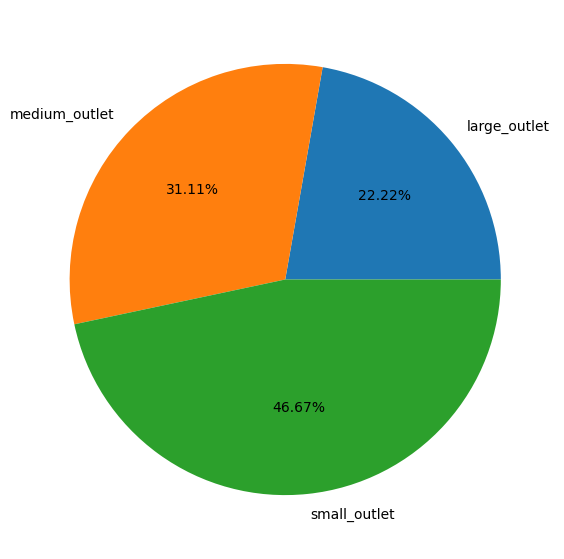

In [154]:
# PLOT SHOWING ALL OUTLET
plt.figure(figsize=(14,7))

outlet_size = ['large_outlet','medium_outlet','small_outlet']
plt.pie(outlet_number,labels=outlet_size, autopct='%.2f%%');

### CONCLUSION

### VISUALIZE EFFECTS OF OUTLET SIZE ON MARKETING

#### PLOT SHOWING EFFECTS OF OUTLET SIZE ON MARKETING OF THE OUTLET


<AxesSubplot:xlabel='Size (msq)', ylabel='Marketing (£)'>

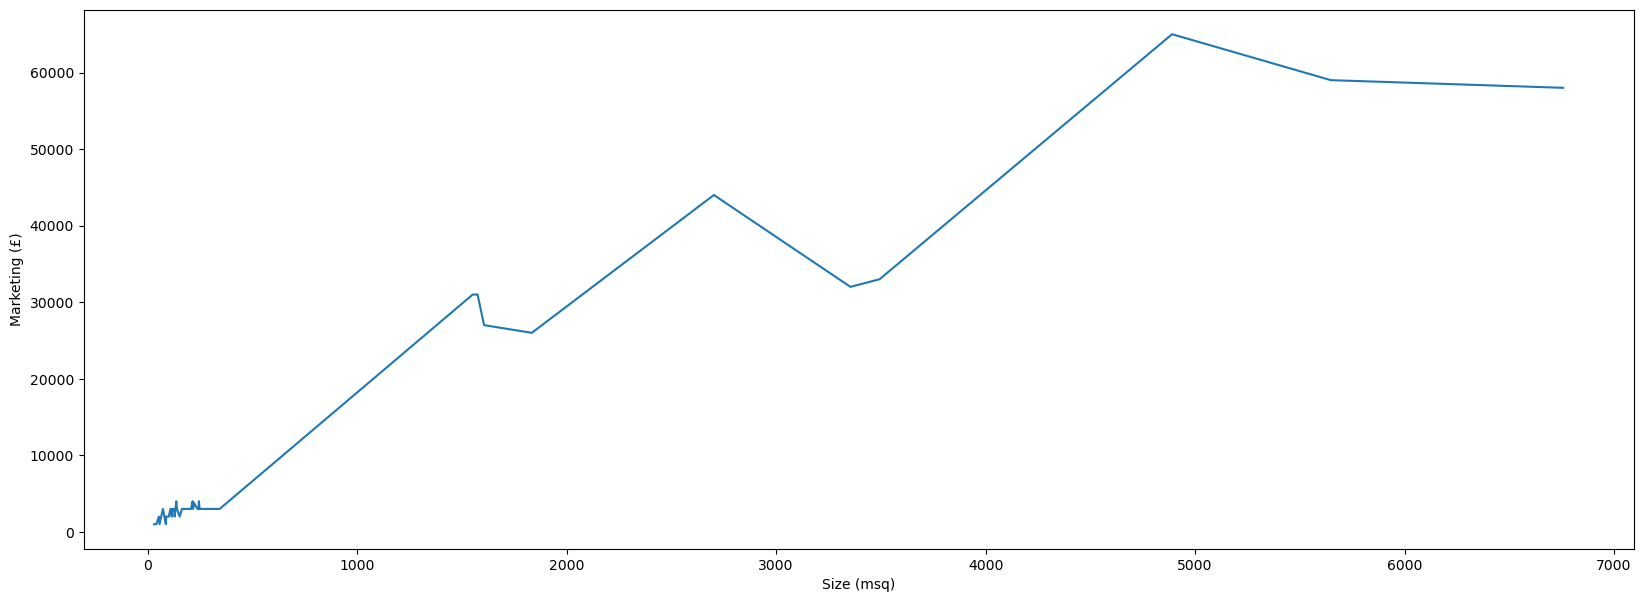

In [216]:
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Size (msq)', y = 'Marketing (£)',data= summary_data)

### CONCLUSION

### VISUALIZE TOP 10 OUTLET WITH THE MOST EXPENSES (OVERHEADS) AND ITS EFFECT ON THEIR MARKETING

In [182]:
# Sorting the Overheads column from in descending order
outlet_overhead = summary_data.sort_values('Overheads (£)', ascending=False)

In [183]:
# Creating a dataframe from the above sorting
outlet_overhead = outlet_overhead[['Id','Overheads (£)','Marketing (£)']]

In [184]:
# View of dataframe
outlet_final = outlet_overhead.head(10)
outlet_final

,Id,Overheads (£),Marketing (£)
16,ZYT,99000,1000
44,HZQ,98000,3000
13,LTU,97000,3000
28,FTW,95000,3000
38,YMQ,92000,1000
26,OTL,90000,3000
21,BMF,88000,32000
6,AYD,81000,2000
4,XSB,76000,2000
18,MZO,76000,3000


<Figure size 1000x200 with 0 Axes>

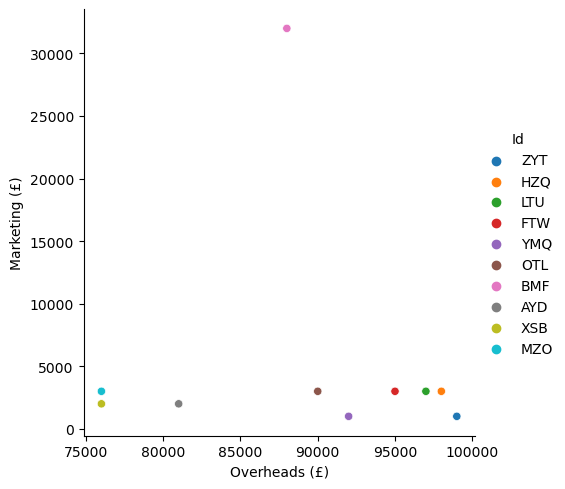

In [214]:
# VISUALIZING TOP 10 OUTLETS WITH THE MOST EXPENSES WITH RESPECT TO MARKETING

plt.figure(figsize=(10,2))
sns.relplot(x = 'Overheads (£)', y = 'Marketing (£)', hue='Id', data=outlet_final)

### VISUALIZE CORRELATION OF OUTLET DATA

<AxesSubplot:>

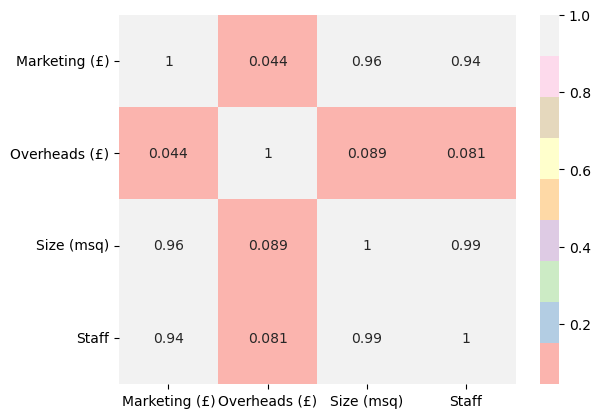

In [195]:
# CORRELATION OF OUR OUTLET DATA (SUMMARY_DATA)

sns.heatmap(summary_data.corr(), annot=True, yticklabels = True, cmap='Pastel1')

### CONCLUSION

### TOP 10 OUTLETS WITH THE MOST MARKETING

In [196]:
# SORTING MARKETING COLUMN IN DESCENDING ORDER AND GETTING THE FIRST 10 ROWS

a = summary_data.sort_values(by='Marketing (£)',ascending=False).head(10)
a

,Id,Marketing (£),Overheads (£),Size (msq),Staff
11,RFY,65000,45000,4890,45
7,RAN,59000,48000,5648,50
15,DMN,58000,73000,6757,58
1,DSA,44000,61000,2703,18
5,EYS,33000,60000,3494,29
21,BMF,32000,88000,3355,30
2,EEC,31000,67000,1575,8
20,CGV,31000,38000,1552,11
14,BSQ,27000,16000,1606,14
19,CYK,26000,75000,1834,18


In [197]:
# SAVING OUTLET NAME INFO AND MARKETING INFO IN A VARIABLE BASED ON THE ABOVE DATA

top_outlet_label = a['Id']
top_outlet_mark = a['Marketing (£)']

<AxesSubplot:xlabel='Id', ylabel='Marketing (£)'>

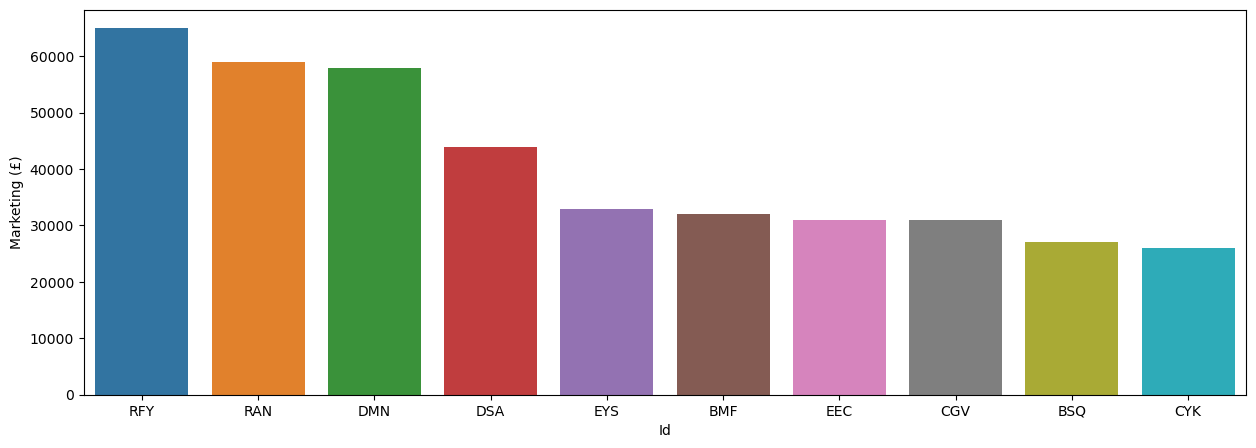

In [211]:
# VISUALIZING TOP 10 OUTLET WITH THE MOST MARKETING

plt.figure(figsize=(15,5))
sns.barplot(x = top_outlet_label, y = top_outlet_mark)

### CONCLUSION

###  TOP 10 OUTLETS WITH THE LEAST MARKETING

In [79]:
# SORTING MARKETING COLUMN IN DESCENDING ORDER AND GETTING THE LAST 10 ROWS

b = summary_data.sort_values(by='Marketing (£)',ascending=False).tail(10)
b

,Id,Marketing (£),Overheads (£),Size (msq),Staff
6,AYD,2000,81000,129,2
41,IZX,2000,32000,54,1
4,XSB,2000,76000,115,2
3,HTF,2000,55000,101,1
22,HNV,2000,69000,153,1
32,ZMY,1000,57000,42,1
34,ZSJ,1000,46000,87,1
16,ZYT,1000,99000,35,1
29,AGN,1000,18000,31,1
38,YMQ,1000,92000,57,1


In [80]:
# SAVING OUTLET NAME INFO AND MARKETING INFO IN A VARIABLE BASED ON THE ABOVE DATA

least_outlet_label = b['Id']
least_outlet_mark = b['Marketing (£)']

<AxesSubplot:xlabel='Id', ylabel='Marketing (£)'>

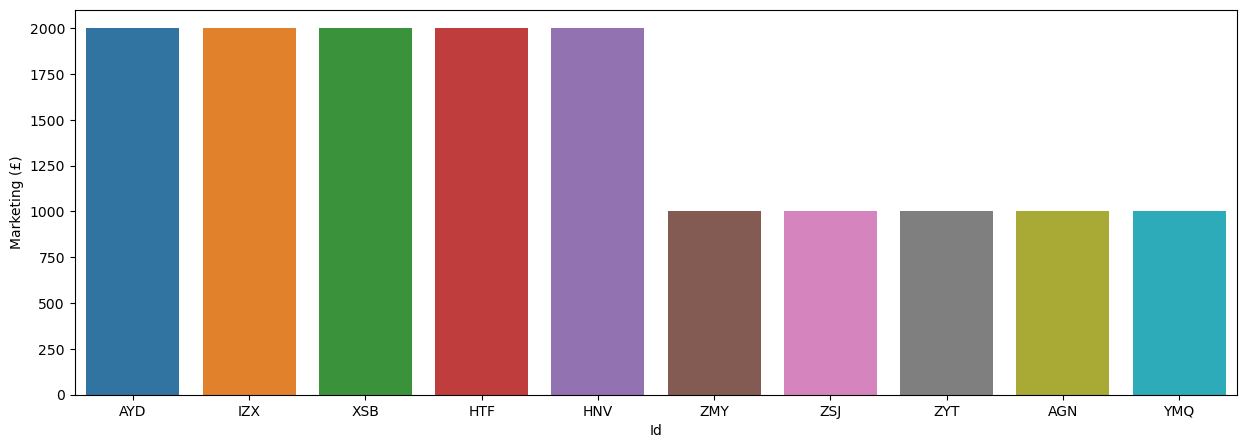

In [212]:
# VISUALIZING TOP 10 OUTLET WITH THE LEAST MARKETING

plt.figure(figsize=(15,5))
sns.barplot(x = least_outlet_label, y = least_outlet_mark)

### CONCLUSION

### SEASONAL BEHAVIOUR

In [87]:
# EFFECTS OF CHANGES IN SEASON ON CUSTOMER VISIT TO OUTLETS
# Creating an instance of original dataframe to prevent editing
new_data = daily_customer_data

In [88]:
# Creating a new column in the newly created dataframe to store all the months given in our data
new_data['Month'] = ''

In [96]:
# List of all the days of customer visit to each outlet
day = []
for i in daily_customer_data['Date']:
    result = int(i[8]+i[9])
    day.append(result)
day = list(range(0, len(day)))

In [97]:
# Filling up the month column we created earlier
for i in day:
    row = new_data['Date'][i]
    month = row[5]+row[6]
    if month == '01':
        new_data['Month'][i] = 'January'
    elif month == '02':
        new_data['Month'][i] = 'February'
    elif month == '03':
        new_data['Month'][i] = 'March'
    elif month == '04':
        new_data['Month'][i] = 'April'
    elif month == '05':
        new_data['Month'][i] = 'May'
    elif month == '06':
        new_data['Month'][i] = 'June'
    elif month == '07':
        new_data['Month'][i] = 'July'
    elif month == '08':
        new_data['Month'][i] = 'August'
    elif month == '09':
        new_data['Month'][i] = 'September'
    elif month == '10':
        new_data['Month'][i] = 'October'
    elif month == '11':
        new_data['Month'][i] = 'November'
    elif month =='12':
        new_data['Month'][i] = 'December'

In [248]:
# Generating a list of all the possible months
new = list(new_data['Month'])
months = []
for i in new:
    if i not in months:
        months.append(i)
# months

#### CUSTOMER VISIT PER MONTH

In [99]:
new_data.head(2)

,Date,PFQ,DSA,EEC,HTF,XSB,EYS,AYD,RAN,CTH,...,CNW,FZI,YMQ,NFH,NLT,IZX,LLK,IFI,HZQ,Month
0,2021-01-01,77,1260,1006,98,0,881,0,1956,65,...,75,82,0,86,65,81,94,68,72,January
1,2021-01-02,63,1062,1045,89,0,935,0,2141,57,...,65,79,0,88,75,86,66,90,62,January


In [100]:
# Function that takes in a month and calculates the number of customer visits in that month
def count_visit(a):
    month = new_data[new_data['Month']==a]
    count = 0
    for i in total_outlets_name:
        result = int(month[i].sum())
        count = count+result
    return count

In [104]:
# Counting the total number of customer visits for each month and saving in a list
customer_visit_count = []
for i in months:
    result = count_visit(i)
    customer_visit_count.append(result)

<AxesSubplot:>

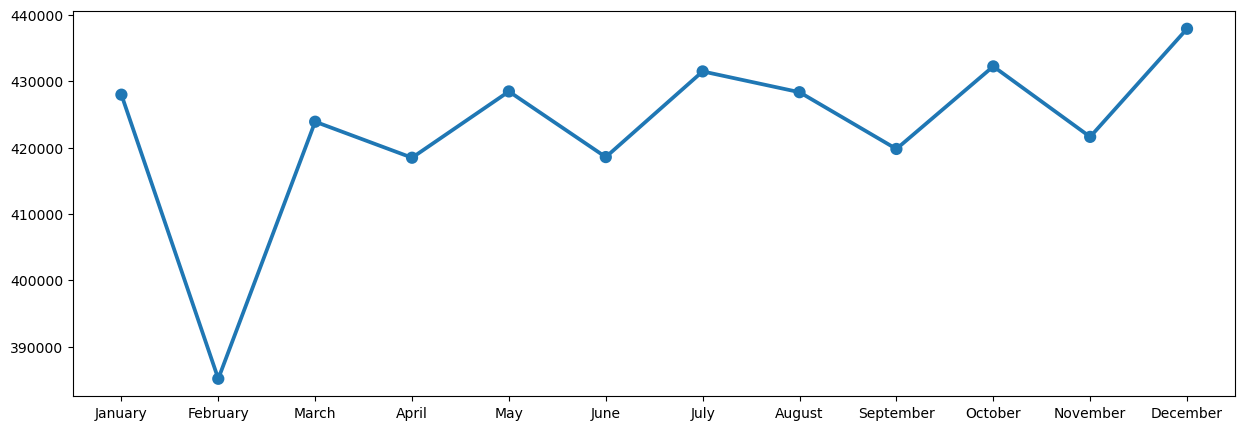

In [105]:
# VISUALIZING THE CHANGE IN CUSTOMER VISITS TO ALL OUTLETS PER MONTH THROUGH OUT THE YEAR 

plt.figure(figsize=(15,5))
sns.pointplot(x=months, y=customer_visit_count)

### CONCLUSION

From the above insights, we can come to the conclusion that customer visits;
- Peeks in december, march, mid-may, mid-july, mid-october
- Drops in mid-january, february, slightly in mid-april, mid-june, september and november

#### EFFECTS OF CUSTOMER VISITS ON OUTLET MARKETING

In [ ]:
daily_customer_data.head()    

In [ ]:
daily_customer_data.shape[0]

In [ ]:
new_data.head()

In [ ]:
new_data.tail()

In [ ]:
large_outlet_names

In [ ]:
# sns.pairplot(new_data)

In [ ]:
jan = new_data[new_data['Month']=='January']
feb = new_data[new_data['Month']=='February']
mar = new_data[new_data['Month']=='March']
apr = new_data[new_data['Month']=='April']
may = new_data[new_data['Month']=='May']
june = new_data[new_data['Month']=='June']
july = new_data[new_data['Month']=='July']
aug = new_data[new_data['Month']=='August']
sept = new_data[new_data['Month']=='September']
octb = new_data[new_data['Month']=='October']
nov = new_data[new_data['Month']=='November']
dec = new_data[new_data['Month']=='December']

In [ ]:
months = []
for i in new_data['Month']:
    if i not in months:
        months.append(i)
# months

In [ ]:
def visit(value):
    result = []
    result.extend(
        (jan[value].sum(),feb[value].sum(),mar[value].sum(),apr[value].sum(),may[value].sum(),
    june[value].sum(),july[value].sum(),aug[value].sum(),sept[value].sum(),octb[value].sum(),nov[value].sum(),
    dec[value].sum())
    )
    return result

#### OUTLET RFY

In [ ]:
plt.figure(figsize=(15,2))
sns.scatterplot(x = months, y = visit('RFY'))

**OUTLET RAN**

In [ ]:
plt.figure(figsize=(15,2))
sns.boxplot(x = months, y = visit('RAN'))

**OUTLET DMN**

In [ ]:
plt.figure(figsize=(15,2))
sns.stripplot(x = months, y = visit('DMN'))

**OUTLET DSA**

In [ ]:
plt.figure(figsize=(15,2))
sns.violinplot(x = months, y = visit('DSA'))

**OUTLET EYS**

In [ ]:
plt.figure(figsize=(15,2))
sns.pointplot(x = months, y = visit('EYS'))

### CONCLUSION